In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
#let's load the dataset
fifa_dataset = pd.read_csv('datasets/fifa dataset.csv')
world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')

In [38]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [39]:
fifa_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [40]:
#Add winning team and goal difference
winner= []

for counter in range(len(fifa_dataset['date'])):
    if(fifa_dataset['home_score'][counter] > fifa_dataset['away_score'][counter]):
        winner.append(fifa_dataset['home_team'][counter])
    elif (fifa_dataset['home_score'][counter] < fifa_dataset['away_score'][counter]):
        winner.append(fifa_dataset['away_team'][counter])
    else:
        winner.append('Draw')

fifa_dataset['winner'] = winner

fifa_dataset['goal_difference'] = np.absolute(fifa_dataset['home_score'] - fifa_dataset['away_score'])


In [41]:
fifa_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [42]:
# let's work for a single team first and later expand to the other teams
# let's select Argentina

df = fifa_dataset[(fifa_dataset['home_team'] == 'Argentina') | (fifa_dataset['away_team'] == 'Argentina')]
argentina = df.iloc[:]
argentina.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
144,1902-07-20,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,Argentina,6
152,1903-09-13,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,Uruguay,1
173,1905-08-15,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,Draw,0
184,1906-08-15,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,Argentina,2
186,1906-10-21,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,Argentina,1


In [43]:
# pick all the games played after 1930 since first world cup was played in 1930
year = []
for row in argentina['date']:
    year.append(int(row[:4]))
argentina['match_year'] = year
argentina_1930 = argentina[argentina.match_year >= 1930]
argentina_1930.reset_index(inplace=True)
argentina_1930.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference,match_year
0,1259,1930-05-25,Argentina,Uruguay,1,1,Copa Newton,Buenos Aires,Argentina,False,Draw,0,1930
1,1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,1,1930
2,1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,Argentina,3,1930
3,1292,1930-07-22,Argentina,Chile,3,1,FIFA World Cup,Montevideo,Uruguay,True,Argentina,2,1930
4,1294,1930-07-26,Argentina,USA,6,1,FIFA World Cup,Montevideo,Uruguay,True,Argentina,5,1930


In [44]:
#for i in range(len(argentina_1930['winner'])):
    #if (argentina_1930['winner'][i] != 'Argentina') and (argentina_1930['winner'][i] != 'Draw') :
        #argentina_1930['winner'][i] = 'Lose'
#argentina_1930['winner'].head(10)
#argentina_1930['winner'][1]
mask = argentina_1930.winner != 'Argentina'
column_name = 'winner'
argentina_1930.loc[mask , column_name] = 'Lose'

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


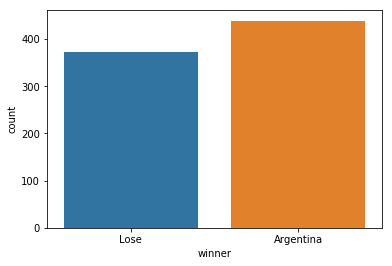

In [45]:
ax = sns.countplot(x="winner", data=argentina_1930)

In [46]:
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']

In [47]:
df_teams_home = fifa_dataset[fifa_dataset['home_team'].isin(worldcup_teams)]
df_teams_away = fifa_dataset[fifa_dataset['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               20778
home_team          20778
away_team          20778
home_score         20778
away_score         20778
tournament         20778
city               20778
country            20778
neutral            20778
winner             20778
goal_difference    20778
dtype: int64

In [48]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,England,1


In [49]:
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930


In [50]:
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,winner
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [51]:
df_teams_1930 = df_teams_1930.reset_index(drop=True)

mask1 = df_teams_1930.winner == df_teams_1930.home_team
col_name1 = 'winner'
mask2 = df_teams_1930.winner == 'Draw'
col_name2 = 'winner'
mask3 = df_teams_1930.winner == df_teams_1930.away_team
col_name3 = 'winner'


df_teams_1930.loc[mask1,col_name1]=2
df_teams_1930.loc[mask2,col_name2]=1
df_teams_1930.loc[mask3,col_name3]=0

df_teams_1930.head()

,home_team,away_team,winner
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


In [52]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winner'], axis=1)
y = final["winner"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
final.head()

,winner,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.571
Test set accuracy:  0.558


In [55]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('datasets/fifa rankings.csv') 
fixtures = pd.read_csv('datasets/fifa-world-cup-2018-fixtures.csv')

# List for storing the group stage games
pred_set = []

In [56]:
# Create new columns with ranking position of each team# Create 
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6,25,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,2 - 2
44,3,60,10,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,0 - 1
45,3,28,16,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,0 - 1
46,3,55,14,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,1 - 2
47,3,13,3,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,0 - 1


In [57]:
# Loop to add teams to new prediction dataset based on the ranking position of each team# Loop t 
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winner': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winner': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winner
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [58]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winner'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#group matches #group m 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.686
Probability of Draw:  0.216
Probability of Saudi Arabia winning:  0.098

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.582
Probability of Draw:  0.352
Probability of Egypt winning:  0.066

Iran and Morocco
Draw
Probability of Iran winning:  0.307
Probability of Draw:  0.433
Probability of Morocco winning:  0.260

Portugal and Spain
Winner: Spain
Probability of Portugal winning:  0.306
Probability of Draw:  0.345
Probability of Spain winning:  0.349

France and Australia
Winner: France
Probability of France winning:  0.621
Probability of Draw:  0.251
Probability of Australia winning:  0.128

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.818
Probability of Draw:  0.151
Probability of Iceland winning:  0.030

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.432
Probability of Draw:  0.185
Probability of Denmark winning:  0.382

Croatia and Nigeria